#**CUSTOMER CLUSTERING**

###Data Collection

*We upload the csv file*

*We import pandas library*

In [ ]:
import pandas as pd

*We read the csv file and store the data in a dataframe and display the first ten rows*

In [ ]:
customer=pd.read_csv('Customers.csv')
customer.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


###Data Cleaning

*We are checking if there is any null value present in the dataset*

In [ ]:
customer.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


*We drop the unnecessary column.*

In [ ]:
customer.drop('CustomerID',axis=1,inplace=True)

*We display the first ten rows*

In [ ]:
customer.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


###Data Visualization

*We are importing seaborn and mathplotlib libraries and then plot a pair plot to see the inter relationship of Age, Annual Income and Spending Score*

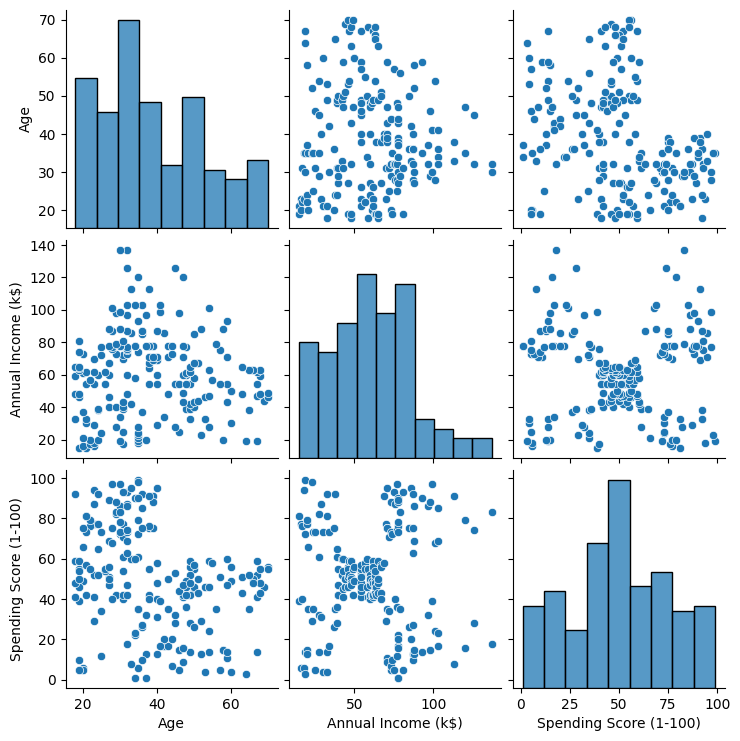

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(customer)
plt.show()

###Model Training

*From the above plot, we can easily identify that there are 5 clusters. Here, KMeans algorithm is used.*

In [ ]:
from sklearn.cluster import KMeans
clusters=5
kmeans = KMeans(n_clusters=clusters, random_state=42)
customer['Cluster'] = kmeans.fit_predict(customer[['Annual Income (k$)','Spending Score (1-100)']])
customer.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
5,Female,22,17,76,2
6,Female,35,18,6,4
7,Female,23,18,94,2
8,Male,64,19,3,4
9,Female,30,19,72,2


###Model Evaluation

*We are visualizing and evaluating the model*

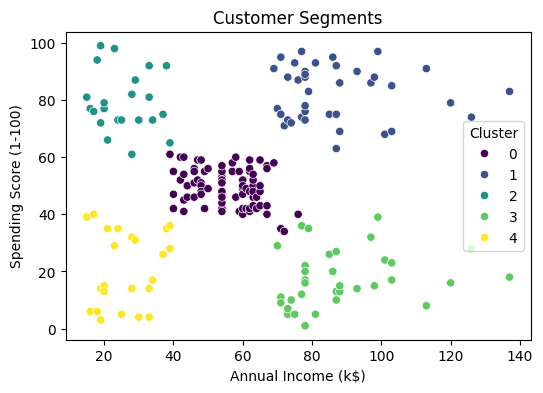

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=customer, palette='viridis')
plt.title('Customer Segments')
plt.show()

In [ ]:
clusternames = {4: "Income & Spending both Low",2: "Low Income & High Spending",0: "Average Income & Average Spending",3: "High Income & Low Spending",1: "Income & Spending both High"}
customer['Segment'] = customer['Cluster'].map(clusternames)

In [ ]:
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Segment
0,Male,19,15,39,4,Income & Spending both Low
1,Male,21,15,81,2,Low Income & High Spending
2,Female,20,16,6,4,Income & Spending both Low
3,Female,23,16,77,2,Low Income & High Spending
4,Female,31,17,40,4,Income & Spending both Low
...,...,...,...,...,...,...
195,Female,35,120,79,1,Income & Spending both High
196,Female,45,126,28,3,High Income & Low Spending
197,Male,32,126,74,1,Income & Spending both High
198,Male,32,137,18,3,High Income & Low Spending
